# Testing functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def point2grid(x, y, effective_area, ns, z = None):
    '''
    Creates a regular grid of Qx x Qy points
    over the effective_area centered at each point
    (x,y).
    
    input
    x: numpy array 1D - x coordinates of the points (in meters).
    y: numpy array 1D - y coordinates of the points (in meters).
    effective_area: tuple - x and y dimensions (in microns) of the area.
    ns: int - number of points along the x- and y-axis.
    y: numpy array 1D - y coordinates of the points (in meters) - default is None.
    
    output
    
    xgrid: numpy array 1D - x coordinates of the grid (in meters).
    ygrid: numpy array 1D - y coordinates of the grid (in meters).
    zgrid: numpy array 1D - z coordinates of the grid (in meters).
    '''
    
    assert (effective_area[0] > 0) and (effective_area[1] > 0), \
    'effective area must be positive'
        
    assert x.size == y.size, 'x and y must have the same number of elements'
    
    if z is not None:
        assert x.size == z.size, 'x, y and z must have the same number of elements'
    
    assert ns%2 != 0, 'ns must be odd'
        
    dx = 0.000001*effective_area[0]/ns
    dy = 0.000001*effective_area[1]/ns
    
    ns2 = int(ns//2)
    Q = int(ns*ns)
    
    x_small_grid, y_small_grid = np.meshgrid(dx*np.arange(-ns2, ns2+1), dy*np.arange(-ns2, ns2+1))
    
    #print x_small_grid
    #print y_small_grid
    
    xgrid = np.resize(x, Q*x.size).reshape(Q,x.size).T.ravel()
    ygrid = np.resize(y, Q*y.size).reshape(Q,y.size).T.ravel()
    
    if z is not None:
        zgrid = np.resize(z, Q*z.size).reshape(Q,z.size).T.ravel()
    
    for i, xi in enumerate(x):
        xgrid[i*Q:(i+1)*Q] += x_small_grid.ravel()
    for i, yi in enumerate(y):
        ygrid[i*Q:(i+1)*Q] += y_small_grid.ravel()
        
    if z is not None:
        return xgrid, ygrid, zgrid
    else:
        return xgrid, ygrid

In [3]:
x, y = np.meshgrid(np.arange(3, dtype='float'), np.arange(3, dtype='float')+1.)
x = x.ravel()
y = y.ravel()
z = np.ones_like(x)

ns = 5
ns2 = int(ns//2)

effective_area = (600000., 600000.)

In [4]:
xg, yg = point2grid(x, y, effective_area, ns)

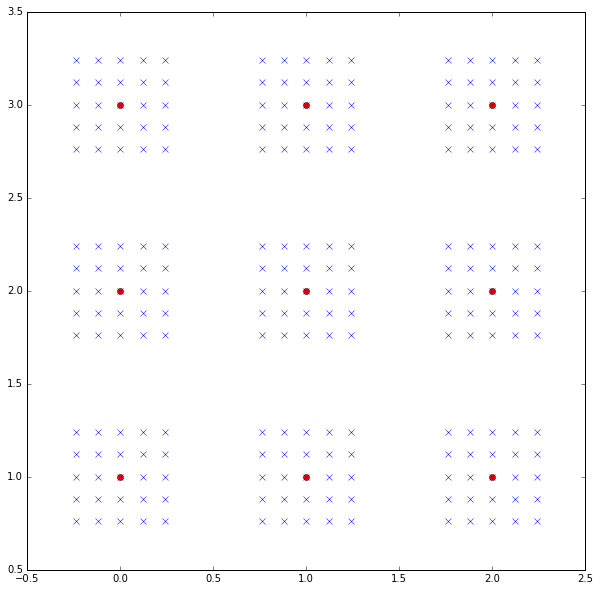

In [5]:
plt.figure(figsize=(10,10))
plt.plot(x, y, 'ro')
plt.plot(xg, yg, 'bx')
plt.show()

In [6]:
xg, yg = point2grid(x, y, effective_area, 4)

AssertionError: ns must be odd

In [7]:
xg, yg = point2grid(x, y, (-100000., 100000.), ns)

AssertionError: effective area must be positive

In [8]:
xg, yg, zg = point2grid(x, y, effective_area, ns, z)

In [9]:
z

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
zg

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [16]:
z.size

9

In [17]:
zg.size

225

In [15]:
np.allclose(ns*ns*z.size, zg.size)

True